<a href="https://colab.research.google.com/github/DanhNguyen21/DanhNguyen21/blob/main/Nh%E1%BA%ADn_d%E1%BA%A1ng_11_t%E1%BB%9D_ti%E1%BB%81n_VN_b%E1%BA%A3n_ch%C3%ADnh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nguyễn Công Danh - 19146164
Lớp AI tối thứ 7
Link google drive: https://drive.google.com/drive/folders/1uSAHNjUEggtZHF0Lj5iL0pCjcMuH4ZEG?usp=sharing

In [1]:
from google.colab import drive
drive.mount("/content/drive",force_remount=True)

Mounted at /content/drive


In [3]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

In [5]:
training_data=train_datagen.flow_from_directory('/content/drive/MyDrive/MONEY-TIỀN/Train',
                                               target_size=(150,150),
                                               batch_size=32,
                                               class_mode ='categorical')

Found 330 images belonging to 11 classes.


In [6]:
validation_data=train_datagen.flow_from_directory('/content/drive/MyDrive/MONEY-TIỀN/Test',
                                               target_size=(150,150),
                                               batch_size=32,
                                               class_mode ='categorical')

Found 220 images belonging to 11 classes.


In [7]:
model=Sequential()
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer = 'he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(11,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 32)        36896     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 43808)             0         
                                                                 
 dense (Dense)               (None, 128)               5

In [8]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [9]:
callbacks=[EarlyStopping(monitor='val_loss',patience=100)]
history=model.fit(training_data,
                  steps_per_epoch=len(training_data),
                  batch_size = 64,
                  epochs=200,
                  validation_data=validation_data,
                  validation_steps=len(validation_data),
                  callbacks=callbacks,
                  verbose = 1)

Epoch 1/200
11/11 [==============================] - 232s 20s/step - loss: 6.5596 - accuracy: 0.0727 - val_loss: 2.3959 - val_accuracy: 0.1273
Epoch 2/200
11/11 [==============================] - 11s 971ms/step - loss: 2.3815 - accuracy: 0.1242 - val_loss: 2.3165 - val_accuracy: 0.2045
Epoch 3/200
11/11 [==============================] - 11s 998ms/step - loss: 2.2820 - accuracy: 0.1545 - val_loss: 2.1731 - val_accuracy: 0.2636
Epoch 4/200
11/11 [==============================] - 11s 1s/step - loss: 2.1191 - accuracy: 0.2152 - val_loss: 2.1055 - val_accuracy: 0.2409
Epoch 5/200
11/11 [==============================] - 11s 1s/step - loss: 1.9616 - accuracy: 0.2970 - val_loss: 2.0819 - val_accuracy: 0.2682
Epoch 6/200
11/11 [==============================] - 11s 997ms/step - loss: 1.8605 - accuracy: 0.3424 - val_loss: 1.8386 - val_accuracy: 0.3364
Epoch 7/200
11/11 [==============================] - 11s 1000ms/step - loss: 1.6398 - accuracy: 0.3970 - val_loss: 1.7495 - val_accuracy: 0.400

Sai số kiểm tra là:  0.18527643382549286
Độ chính xác kiểm tra là:  0.9772727489471436


<function matplotlib.pyplot.show>

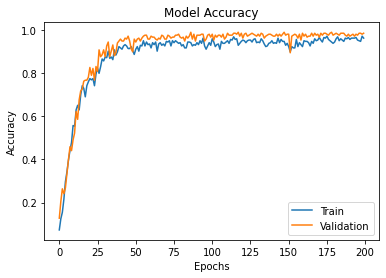

In [10]:
#đánh giá chất lượng của mô hình và vẽ lại
score = model.evaluate(validation_data,verbose=0)
print('Sai số kiểm tra là: ',score[0])
print('Độ chính xác kiểm tra là: ',score[1])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show

In [11]:
model.save('model_nhan_dien_tien_VN.h5')
model=load_model('model_nhan_dien_tien_VN.h5')

In [13]:
training_data.class_indices

{'100k': 0,
 '10k': 1,
 '1k': 2,
 '200': 3,
 '200k': 4,
 '20k': 5,
 '2k': 6,
 '500': 7,
 '500k': 8,
 '50k': 9,
 '5k': 10}

Tờ này là 1k


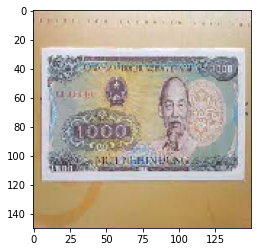

In [37]:
img=load_img("/content/drive/MyDrive/MONEY-TIỀN/PIC/tải xuống (10).jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model.predict(img)
if round(result[0][0])==1:
  prediction='Tờ này là 100k'
if round(result[0][1])==1:
  prediction='Tờ này là 10k'
if round(result[0][2])==1:
  prediction='Tờ này là 1k'
if round(result[0][3])==1:
  prediction='Tờ này là 200 đồng'
if round(result[0][4])==1:
  prediction='Tờ này là 200k'
if round(result[0][5])==1:
  prediction='Tờ này là 20k'
if round(result[0][6])==1:
  prediction='Tờ này là 2k'
if round(result[0][7])==1:
  prediction='Tờ này là 500 đồng'
if round(result[0][8])==1:
  prediction='Tờ này là 500k'
if round(result[0][9])==1:
  prediction='Tờ này là 50k'
if round(result[0][10])==1:
  prediction='Tờ này là 5k'
print(prediction)

Tờ này là 100k


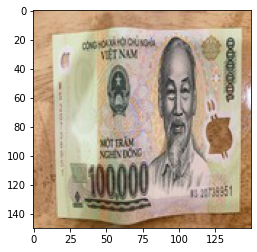

In [36]:
img=load_img("/content/drive/MyDrive/MONEY-TIỀN/PIC/100k.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model.predict(img)
if round(result[0][0])==1:
  prediction='Tờ này là 100k'
if round(result[0][1])==1:
  prediction='Tờ này là 10k'
if round(result[0][2])==1:
  prediction='Tờ này là 1k'
if round(result[0][3])==1:
  prediction='Tờ này là 200 đồng'
if round(result[0][4])==1:
  prediction='Tờ này là 200k'
if round(result[0][5])==1:
  prediction='Tờ này là 20k'
if round(result[0][6])==1:
  prediction='Tờ này là 2k'
if round(result[0][7])==1:
  prediction='Tờ này là 500 đồng'
if round(result[0][8])==1:
  prediction='Tờ này là 500k'
if round(result[0][9])==1:
  prediction='Tờ này là 50k'
if round(result[0][10])==1:
  prediction='Tờ này là 5k'
print(prediction)

Tờ này là 200 đồng


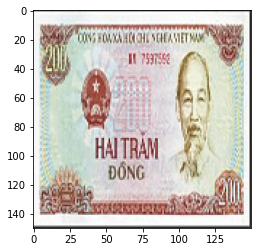

In [26]:
img=load_img("/content/drive/MyDrive/MONEY-TIỀN/PIC/200d.jpg",target_size=(150,150))
plt.imshow(img)
#img = img.reshape(150,150,3) 
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model.predict(img)
if round(result[0][0])==1:
  prediction='Tờ này là 100k'
if round(result[0][1])==1:
  prediction='Tờ này là 10k'
if round(result[0][2])==1:
  prediction='Tờ này là 1k'
if round(result[0][3])==1:
  prediction='Tờ này là 200 đồng'
if round(result[0][4])==1:
  prediction='Tờ này là 200k'
if round(result[0][5])==1:
  prediction='Tờ này là 20k'
if round(result[0][6])==1:
  prediction='Tờ này là 2k'
if round(result[0][7])==1:
  prediction='Tờ này là 500 đồng'
if round(result[0][8])==1:
  prediction='Tờ này là 500k'
if round(result[0][9])==1:
  prediction='Tờ này là 50k'
if round(result[0][10])==1:
  prediction='Tờ này là 5k'
print(prediction)

Tờ này là 1k


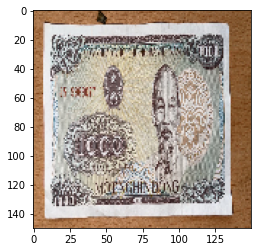

In [28]:
img=load_img("/content/drive/MyDrive/MONEY-TIỀN/PIC/1000.jpg",target_size=(150,150))
plt.imshow(img)
#img = img.reshape(150,150,3) 
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model.predict(img)
if round(result[0][0])==1:
  prediction='Tờ này là 100k'
if round(result[0][1])==1:
  prediction='Tờ này là 10k'
if round(result[0][2])==1:
  prediction='Tờ này là 1k'
if round(result[0][3])==1:
  prediction='Tờ này là 200 đồng'
if round(result[0][4])==1:
  prediction='Tờ này là 200k'
if round(result[0][5])==1:
  prediction='Tờ này là 20k'
if round(result[0][6])==1:
  prediction='Tờ này là 2k'
if round(result[0][7])==1:
  prediction='Tờ này là 500 đồng'
if round(result[0][8])==1:
  prediction='Tờ này là 500k'
if round(result[0][9])==1:
  prediction='Tờ này là 50k'
if round(result[0][10])==1:
  prediction='Tờ này là 5k'
print(prediction)

Tờ này là 5k


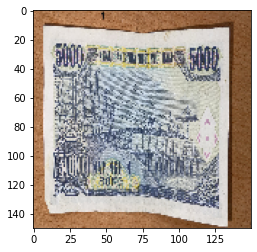

In [29]:
img=load_img("/content/drive/MyDrive/MONEY-TIỀN/PIC/5000.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model.predict(img)
if round(result[0][0])==1:
  prediction='Tờ này là 100k'
if round(result[0][1])==1:
  prediction='Tờ này là 10k'
if round(result[0][2])==1:
  prediction='Tờ này là 1k'
if round(result[0][3])==1:
  prediction='Tờ này là 200 đồng'
if round(result[0][4])==1:
  prediction='Tờ này là 200k'
if round(result[0][5])==1:
  prediction='Tờ này là 20k'
if round(result[0][6])==1:
  prediction='Tờ này là 2k'
if round(result[0][7])==1:
  prediction='Tờ này là 500 đồng'
if round(result[0][8])==1:
  prediction='Tờ này là 500k'
if round(result[0][9])==1:
  prediction='Tờ này là 50k'
if round(result[0][10])==1:
  prediction='Tờ này là 5k'
print(prediction)

Tờ này là 5k


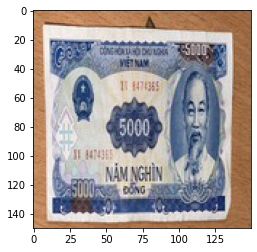

In [31]:
img=load_img("/content/drive/MyDrive/MONEY-TIỀN/PIC/5000(1) (1).jpg",target_size=(150,150))
plt.imshow(img)
#img = img.reshape(150,150,3) 
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model.predict(img)
if round(result[0][0])==1:
  prediction='Tờ này là 100k'
if round(result[0][1])==1:
  prediction='Tờ này là 10k'
if round(result[0][2])==1:
  prediction='Tờ này là 1k'
if round(result[0][3])==1:
  prediction='Tờ này là 200 đồng'
if round(result[0][4])==1:
  prediction='Tờ này là 200k'
if round(result[0][5])==1:
  prediction='Tờ này là 20k'
if round(result[0][6])==1:
  prediction='Tờ này là 2k'
if round(result[0][7])==1:
  prediction='Tờ này là 500 đồng'
if round(result[0][8])==1:
  prediction='Tờ này là 500k'
if round(result[0][9])==1:
  prediction='Tờ này là 50k'
if round(result[0][10])==1:
  prediction='Tờ này là 5k'
print(prediction)

Tờ này là 10k


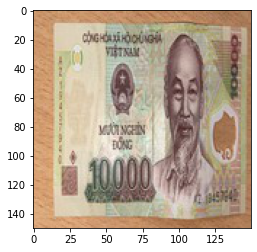

In [33]:
img=load_img("/content/drive/MyDrive/MONEY-TIỀN/PIC/10000 (1).jpg",target_size=(150,150))
plt.imshow(img) 
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model.predict(img)
if round(result[0][0])==1:
  prediction='Tờ này là 100k'
if round(result[0][1])==1:
  prediction='Tờ này là 10k'
if round(result[0][2])==1:
  prediction='Tờ này là 1k'
if round(result[0][3])==1:
  prediction='Tờ này là 200 đồng'
if round(result[0][4])==1:
  prediction='Tờ này là 200k'
if round(result[0][5])==1:
  prediction='Tờ này là 20k'
if round(result[0][6])==1:
  prediction='Tờ này là 2k'
if round(result[0][7])==1:
  prediction='Tờ này là 500 đồng'
if round(result[0][8])==1:
  prediction='Tờ này là 500k'
if round(result[0][9])==1:
  prediction='Tờ này là 50k'
if round(result[0][10])==1:
  prediction='Tờ này là 5k'
print(prediction)

Tờ này là 200k


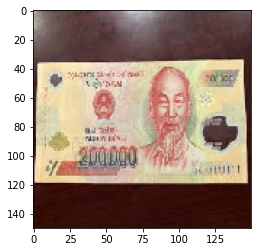

In [39]:
img=load_img("/content/drive/MyDrive/MONEY-TIỀN/PIC/images.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model.predict(img)
if round(result[0][0])==1:
  prediction='Tờ này là 100k'
if round(result[0][1])==1:
  prediction='Tờ này là 10k'
if round(result[0][2])==1:
  prediction='Tờ này là 1k'
if round(result[0][3])==1:
  prediction='Tờ này là 200 đồng'
if round(result[0][4])==1:
  prediction='Tờ này là 200k'
if round(result[0][5])==1:
  prediction='Tờ này là 20k'
if round(result[0][6])==1:
  prediction='Tờ này là 2k'
if round(result[0][7])==1:
  prediction='Tờ này là 500 đồng'
if round(result[0][8])==1:
  prediction='Tờ này là 500k'
if round(result[0][9])==1:
  prediction='Tờ này là 50k'
if round(result[0][10])==1:
  prediction='Tờ này là 5k'
print(prediction)

Tờ này là 500k


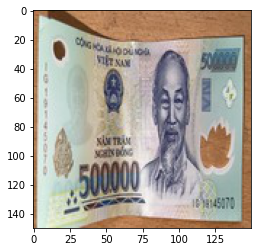

In [41]:
img=load_img("/content/drive/MyDrive/MONEY-TIỀN/PIC/500000 (1).jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model.predict(img)
if round(result[0][0])==1:
  prediction='Tờ này là 100k'
if round(result[0][1])==1:
  prediction='Tờ này là 10k'
if round(result[0][2])==1:
  prediction='Tờ này là 1k'
if round(result[0][3])==1:
  prediction='Tờ này là 200 đồng'
if round(result[0][4])==1:
  prediction='Tờ này là 200k'
if round(result[0][5])==1:
  prediction='Tờ này là 20k'
if round(result[0][6])==1:
  prediction='Tờ này là 2k'
if round(result[0][7])==1:
  prediction='Tờ này là 500 đồng'
if round(result[0][8])==1:
  prediction='Tờ này là 500k'
if round(result[0][9])==1:
  prediction='Tờ này là 50k'
if round(result[0][10])==1:
  prediction='Tờ này là 5k'
print(prediction)

Tờ này là 500k


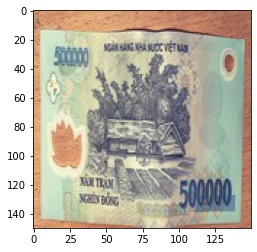

In [42]:
img=load_img("/content/drive/MyDrive/MONEY-TIỀN/PIC/5000001 (1).jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model.predict(img)
if round(result[0][0])==1:
  prediction='Tờ này là 100k'
if round(result[0][1])==1:
  prediction='Tờ này là 10k'
if round(result[0][2])==1:
  prediction='Tờ này là 1k'
if round(result[0][3])==1:
  prediction='Tờ này là 200 đồng'
if round(result[0][4])==1:
  prediction='Tờ này là 200k'
if round(result[0][5])==1:
  prediction='Tờ này là 20k'
if round(result[0][6])==1:
  prediction='Tờ này là 2k'
if round(result[0][7])==1:
  prediction='Tờ này là 500 đồng'
if round(result[0][8])==1:
  prediction='Tờ này là 500k'
if round(result[0][9])==1:
  prediction='Tờ này là 50k'
if round(result[0][10])==1:
  prediction='Tờ này là 5k'
print(prediction)

Tờ này là 500 đồng


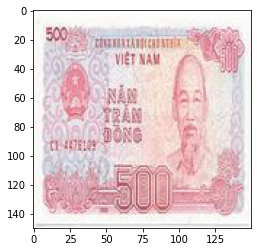

In [45]:
img=load_img("/content/drive/MyDrive/MONEY-TIỀN/PIC/500d.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model.predict(img)
if round(result[0][0])==1:
  prediction='Tờ này là 100k'
if round(result[0][1])==1:
  prediction='Tờ này là 10k'
if round(result[0][2])==1:
  prediction='Tờ này là 1k'
if round(result[0][3])==1:
  prediction='Tờ này là 200 đồng'
if round(result[0][4])==1:
  prediction='Tờ này là 200k'
if round(result[0][5])==1:
  prediction='Tờ này là 20k'
if round(result[0][6])==1:
  prediction='Tờ này là 2k'
if round(result[0][7])==1:
  prediction='Tờ này là 500 đồng'
if round(result[0][8])==1:
  prediction='Tờ này là 500k'
if round(result[0][9])==1:
  prediction='Tờ này là 50k'
if round(result[0][10])==1:
  prediction='Tờ này là 5k'
print(prediction)

Tờ này là 20k


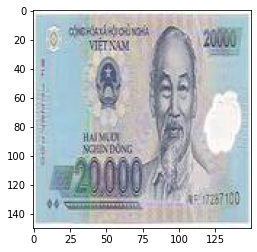

In [46]:
img=load_img("/content/drive/MyDrive/MONEY-TIỀN/PIC/20K.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model.predict(img)
if round(result[0][0])==1:
  prediction='Tờ này là 100k'
if round(result[0][1])==1:
  prediction='Tờ này là 10k'
if round(result[0][2])==1:
  prediction='Tờ này là 1k'
if round(result[0][3])==1:
  prediction='Tờ này là 200 đồng'
if round(result[0][4])==1:
  prediction='Tờ này là 200k'
if round(result[0][5])==1:
  prediction='Tờ này là 20k'
if round(result[0][6])==1:
  prediction='Tờ này là 2k'
if round(result[0][7])==1:
  prediction='Tờ này là 500 đồng'
if round(result[0][8])==1:
  prediction='Tờ này là 500k'
if round(result[0][9])==1:
  prediction='Tờ này là 50k'
if round(result[0][10])==1:
  prediction='Tờ này là 5k'
print(prediction)

Tờ này là 2k


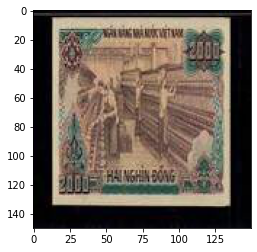

In [48]:
img=load_img("/content/drive/MyDrive/MONEY-TIỀN/PIC/2k.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model.predict(img)
if round(result[0][0])==1:
  prediction='Tờ này là 100k'
if round(result[0][1])==1:
  prediction='Tờ này là 10k'
if round(result[0][2])==1:
  prediction='Tờ này là 1k'
if round(result[0][3])==1:
  prediction='Tờ này là 200 đồng'
if round(result[0][4])==1:
  prediction='Tờ này là 200k'
if round(result[0][5])==1:
  prediction='Tờ này là 20k'
if round(result[0][6])==1:
  prediction='Tờ này là 2k'
if round(result[0][7])==1:
  prediction='Tờ này là 500 đồng'
if round(result[0][8])==1:
  prediction='Tờ này là 500k'
if round(result[0][9])==1:
  prediction='Tờ này là 50k'
if round(result[0][10])==1:
  prediction='Tờ này là 5k'
print(prediction)

Tờ này là 200k


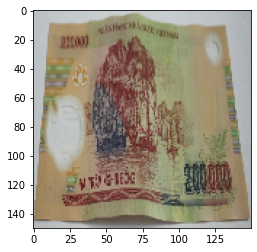

In [62]:
img=load_img("/content/drive/MyDrive/MONEY-TIỀN/PIC/200000.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model.predict(img)
if round(result[0][0])==1:
  prediction='Tờ này là 100k'
if round(result[0][1])==1:
  prediction='Tờ này là 10k'
if round(result[0][2])==1:
  prediction='Tờ này là 1k'
if round(result[0][3])==1:
  prediction='Tờ này là 200 đồng'
if round(result[0][4])==1:
  prediction='Tờ này là 200k'
if round(result[0][5])==1:
  prediction='Tờ này là 20k'
if round(result[0][6])==1:
  prediction='Tờ này là 2k'
if round(result[0][7])==1:
  prediction='Tờ này là 500 đồng'
if round(result[0][8])==1:
  prediction='Tờ này là 500k'
if round(result[0][9])==1:
  prediction='Tờ này là 50k'
if round(result[0][10])==1:
  prediction='Tờ này là 5k'
print(prediction)

Tờ này là 5k


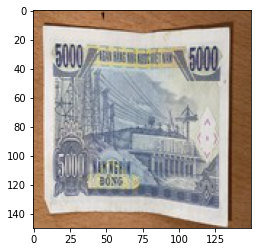

In [64]:
img=load_img("/content/drive/MyDrive/MONEY-TIỀN/PIC/5000 (1).jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model.predict(img)
if round(result[0][0])==1:
  prediction='Tờ này là 100k'
if round(result[0][1])==1:
  prediction='Tờ này là 10k'
if round(result[0][2])==1:
  prediction='Tờ này là 1k'
if round(result[0][3])==1:
  prediction='Tờ này là 200 đồng'
if round(result[0][4])==1:
  prediction='Tờ này là 200k'
if round(result[0][5])==1:
  prediction='Tờ này là 20k'
if round(result[0][6])==1:
  prediction='Tờ này là 2k'
if round(result[0][7])==1:
  prediction='Tờ này là 500 đồng'
if round(result[0][8])==1:
  prediction='Tờ này là 500k'
if round(result[0][9])==1:
  prediction='Tờ này là 50k'
if round(result[0][10])==1:
  prediction='Tờ này là 5k'
print(prediction)

Tờ này là 50k


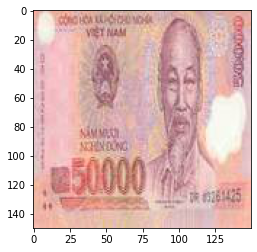

In [80]:
img=load_img("/content/drive/MyDrive/MONEY-TIỀN/PIC/truoc-1366979556_m_460x0 (1).jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model.predict(img)
if round(result[0][0])==1:
  prediction='Tờ này là 100k'
if round(result[0][1])==1:
  prediction='Tờ này là 10k'
if round(result[0][2])==1:
  prediction='Tờ này là 1k'
if round(result[0][3])==1:
  prediction='Tờ này là 200 đồng'
if round(result[0][4])==1:
  prediction='Tờ này là 200k'
if round(result[0][5])==1:
  prediction='Tờ này là 20k'
if round(result[0][6])==1:
  prediction='Tờ này là 2k'
if round(result[0][7])==1:
  prediction='Tờ này là 500 đồng'
if round(result[0][8])==1:
  prediction='Tờ này là 500k'
if round(result[0][9])==1:
  prediction='Tờ này là 50k'
if round(result[0][10])==1:
  prediction='Tờ này là 5k'
print(prediction)